<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-07-EndToEndProject/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Understand Bussiness problem
*   Get the Data
*   Visualize
*   feature engineering  (model readable)
*   pipeline
*   select and train model
*   fine tuning


# Get The Data

In [1]:
import pandas as pd

df = housing = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11088,-117.89,33.82,21.0,1591.0,298.0,904.0,297.0,4.8906,179100.0,<1H OCEAN
19429,-121.06,37.67,31.0,906.0,146.0,383.0,129.0,3.4167,196900.0,INLAND
250,-122.22,37.78,51.0,1637.0,463.0,1543.0,393.0,2.4890,119100.0,NEAR BAY
1245,-122.04,39.22,27.0,1446.0,295.0,670.0,281.0,3.2625,92800.0,INLAND
9475,-123.38,39.37,18.0,3946.0,813.0,1899.0,730.0,2.6424,124600.0,<1H OCEAN
5877,-118.35,34.16,42.0,2267.0,478.0,1083.0,458.0,3.2015,250000.0,<1H OCEAN
377,-122.16,37.75,35.0,667.0,140.0,406.0,133.0,3.8047,94300.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing['housing_median_age'] = housing['housing_median_age'].astype('int32')

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int32  
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ MB


# Visualize

In [7]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

C:\Users\shank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


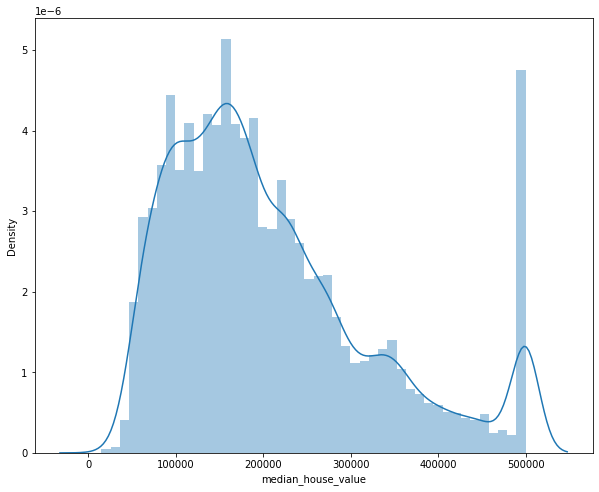

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.distplot(housing['median_house_value'])
plt.show()

In [9]:
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

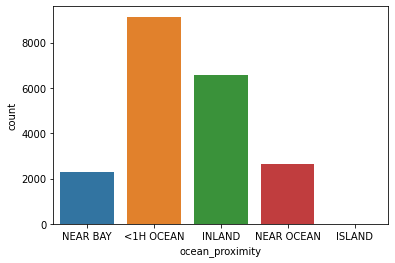

In [11]:
sns.countplot(data = housing, x = 'ocean_proximity')

In [12]:
import plotly.express as px

px.box(df, x='ocean_proximity', y='median_house_value')

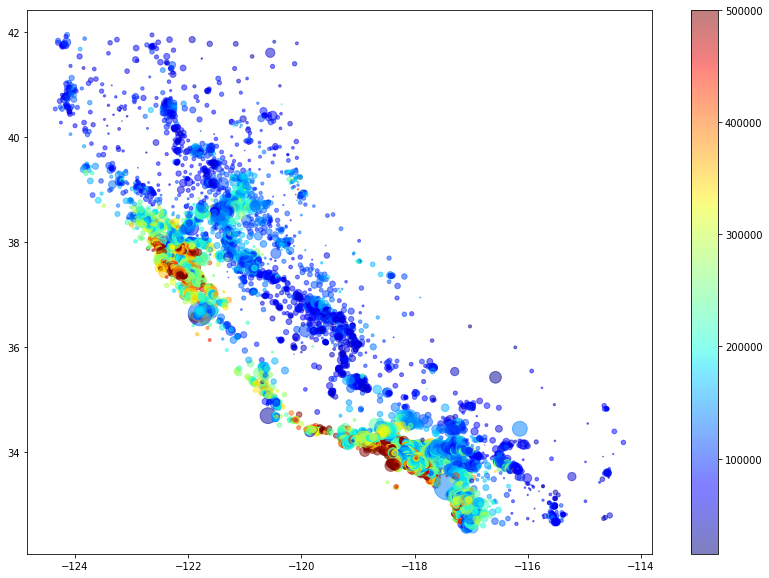

In [13]:
plt.figure(figsize = (14, 10))

plt.scatter(housing['longitude'], housing['latitude'], c = housing['median_house_value'], s=housing['population']/50, alpha=0.5, cmap='jet')
plt.colorbar()

plt.show()

In [14]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

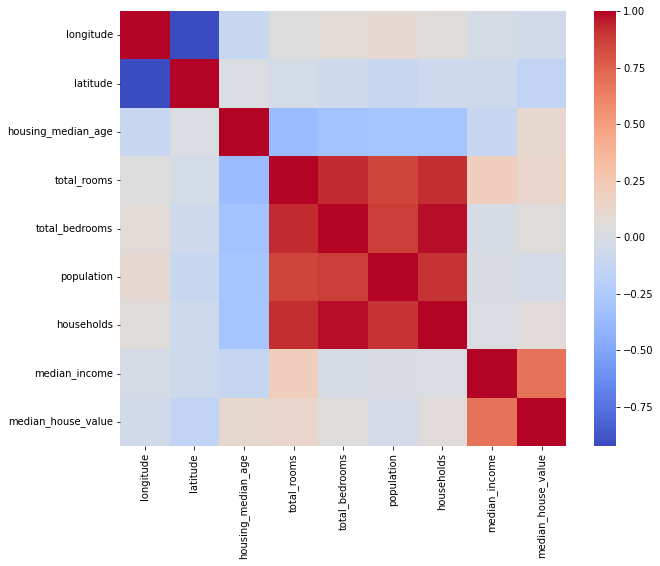

In [15]:
plt.figure(figsize = (10, 8))

sns.heatmap(df.corr(), cmap='coolwarm')

In [16]:
df.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**plot all numerical features agains each other scatter matrix**

# Feature Engineering

## Experiment with Columns

In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
housing['roomsperhouse'] = housing['total_rooms'] / housing['households']

In [19]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [20]:
housing['populationperhouse'] = housing['population'] / housing['households']
housing['bedroomperroom'] = housing['total_bedrooms'] / housing['total_rooms']

In [21]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
roomsperhouse         0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
populationperhouse   -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroomperroom       -0.255880
Name: median_house_value, dtype: float64

In [22]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
roomsperhouse           0
populationperhouse      0
bedroomperroom        207
dtype: int64

# Preparing dataset for ML Algorithm

## Missing Data


*   drop col
*   drop row
*   fill some info


In [23]:
housing['total_bedrooms'].median()

435.0

In [24]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
roomsperhouse           0
populationperhouse      0
bedroomperroom        207
dtype: int64

In [25]:
housing['bedroomperroom'] = housing['total_bedrooms'] / housing['total_rooms']

In [26]:
from sklearn.impute import SimpleImputer

ss = SimpleImputer(strategy = 'median')

ss.fit(housing[['total_bedrooms']])

SimpleImputer(strategy='median')

In [27]:
ss.transform(housing[['total_bedrooms']])

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

## Text & Categorical Values

Most Machine Learning algorithms prefer to work with numbers, so replacing string with numbers.

*   OrdinalEncoder (comparable or rank)
*   OneHotEncoder (not comparable)


**Ordinal Encoder**

replace comparable with numbers example(poor, average, good)

Marks     Grade

30         D

50         C

70         B

100        A


convert all grades to numbers from 0 to 3

Marks     Grade

30         0

50         1

70         2

100        3

Logic higher the marks higher the grade

**OneHotEncoder**

Marks     State

30         delhi

50         up

70         bihar

100        chhattisgarh

convert all State to numbers from 0 to 3

Marks     State

30         0

50         1

70         2

100        3


### OrdinalEncoder

In [28]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
from sklearn import preprocessing

od = preprocessing.OrdinalEncoder(categories = [
                                   ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
])

od.fit(housing[['ocean_proximity']])

OrdinalEncoder(categories=[['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY',
                            'ISLAND']])

In [30]:
od.fit_transform(housing[['ocean_proximity']])

array([[3.],
       [3.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

In [31]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


In [32]:
od.transform( housing[['ocean_proximity']] )

array([[3.],
       [3.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

### OneHotEncoder

In [33]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892
20639,-121.24,39.37,16,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,2.616981,0.221185


In [34]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [35]:
oh = preprocessing.OneHotEncoder()

oh.fit_transform(housing[['ocean_proximity']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Scaling

*   Standardiztion
*   Normalization

In [36]:
ss = preprocessing.StandardScaler()

ss.fit(housing.drop('ocean_proximity', axis = 1))

ss.transform(housing.drop('ocean_proximity', axis = 1))

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

# Pipelining

In [37]:
housing_X = housing.drop(['median_house_value'], axis = 1)
housing_X.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
6219,-117.91,34.06,29,3250.0,521.0,1382.0,513.0,5.1120,<1H OCEAN,6.335283,2.693957,0.160308
17228,-119.74,34.45,29,2526.0,388.0,1092.0,409.0,6.0597,<1H OCEAN,6.176039,2.669927,0.153603
1207,-121.75,39.40,29,1687.0,327.0,864.0,334.0,2.4943,INLAND,5.050898,2.586826,0.193835


In [38]:
housing_Y = housing['median_house_value']
housing_Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [39]:
import numpy as np

numeric_columns = np.array(housing_X.drop(['ocean_proximity'], axis = 1).columns)
cat_columns = ['ocean_proximity']

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

od = preprocessing.OrdinalEncoder(categories = [
                                   ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
])

numerical_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy = 'median')),
                               ('scaler', preprocessing.StandardScaler())
                               ]
)

complete_pipeline = ColumnTransformer([
        ('cat', od, cat_columns),
        ('num', numerical_pipeline, numeric_columns)
])

# Select and train model

In [41]:
X = complete_pipeline.fit_transform(housing_X)
y = housing_Y

## LinearRegression

In [42]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

In [43]:
y_pred = lin.predict(X)

In [44]:
X.shape

(20640, 12)

In [45]:
y_pred.shape

(20640,)

In [46]:
for res in zip(y, y_pred):
  print(res)

(452600.0, 417041.0548575104)
(358500.0, 441158.6308249543)
(352100.0, 387093.1501325511)
(341300.0, 328533.98592367704)
(342200.0, 260277.1517568647)
(269700.0, 271626.7597546128)
(299200.0, 264896.36646447715)
(241400.0, 263710.35925614735)
(226700.0, 209032.74826197675)
(261100.0, 275472.7562272735)
(281500.0, 241988.1920563421)
(241800.0, 265758.7844049687)
(213500.0, 236035.00948875892)
(191300.0, 222778.7510452927)
(159200.0, 210663.56365897658)
(140000.0, 193185.75820749433)
(152500.0, 217933.6395616536)
(155500.0, 199371.11037781963)
(158700.0, 191329.28157185315)
(162900.0, 210909.98912146955)
(147500.0, 150198.74106752413)
(159800.0, 168316.78963497747)
(113900.0, 192860.25559070462)
(99700.0, 193337.7754439918)
(132600.0, 216414.70392128214)
(107500.0, 188404.20853459212)
(93800.0, 201509.15842364077)
(105500.0, 180755.94434115753)
(108900.0, 182767.5163283177)
(132000.0, 171938.1167939605)
(122300.0, 193093.42794089875)
(115200.0, 191153.83458757936)
(110400.0, 172438.33204

**MSE** = sum((y-y_pred)^2) / N

In [47]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

4743931626.928953

In [48]:
np.sqrt(mse)

68876.20508513048

## DesisionTree

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor()

In [50]:
y_pred = tree.predict(X)

In [51]:
mse = mean_squared_error(y, y_pred)
mse

0.0

**OverFitting**

In [52]:
for res in zip(y, y_pred):
  print(res)

(452600.0, 452600.0)
(358500.0, 358500.0)
(352100.0, 352100.0)
(341300.0, 341300.0)
(342200.0, 342200.0)
(269700.0, 269700.0)
(299200.0, 299200.0)
(241400.0, 241400.0)
(226700.0, 226700.0)
(261100.0, 261100.0)
(281500.0, 281500.0)
(241800.0, 241800.0)
(213500.0, 213500.0)
(191300.0, 191300.0)
(159200.0, 159200.0)
(140000.0, 140000.0)
(152500.0, 152500.0)
(155500.0, 155500.0)
(158700.0, 158700.0)
(162900.0, 162900.0)
(147500.0, 147500.0)
(159800.0, 159800.0)
(113900.0, 113900.0)
(99700.0, 99700.0)
(132600.0, 132600.0)
(107500.0, 107500.0)
(93800.0, 93800.0)
(105500.0, 105500.0)
(108900.0, 108900.0)
(132000.0, 132000.0)
(122300.0, 122300.0)
(115200.0, 115200.0)
(110400.0, 110400.0)
(104900.0, 104900.0)
(109700.0, 109700.0)
(97200.0, 97200.0)
(104500.0, 104500.0)
(103900.0, 103900.0)
(191400.0, 191400.0)
(176000.0, 176000.0)
(155400.0, 155400.0)
(150000.0, 150000.0)
(118800.0, 118800.0)
(188800.0, 188800.0)
(184400.0, 184400.0)
(182300.0, 182300.0)
(142500.0, 142500.0)
(137500.0, 137500.0

## Validation



*   Hold-out
*   cross-validation



In [53]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y)

In [54]:
x_train.shape, y_train.shape

((15480, 12), (15480,))

In [55]:
x_val.shape, y_val.shape

((5160, 12), (5160,))

In [56]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred = tree.predict(x_val)

In [58]:
mse = mean_squared_error(y_val, y_pred)
mse

5148680339.499418

## RandomForest

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [60]:
y_pred = forest.predict(x_val)

In [61]:
mean_squared_error(y_val, y_pred)

2704734086.472486

In [62]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(forest, X, y, cv = 4)

In [63]:
mean_squared_error(y, y_pred)

4712188544.851063

## Save The Model

joblib
pickel

In [64]:
import joblib

joblib.dump(forest, 'model')

['model']

In [65]:
model = joblib.load('model')

In [66]:
!ls -l  ./model

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
mean_squared_error(model.predict(x_val), y_val)

2704734086.472486

## HyperParameter Tuning





In [68]:
forest = RandomForestRegressor(n_estimators = 150, max_features=4)

forest.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=150)

In [69]:
y_pred = forest.predict(x_val)

In [70]:
mean_squared_error(y_val, y_pred)

2510835439.713741

### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

params = [
          {'n_estimators': [4, 6, 7], 'max_features': [2, 6]}, # 12
          {'bootstrap': [True, False], 'max_depth' : [2,4], 'max_features': [2]} # 12
        ]

gscv = GridSearchCV(forest, params, scoring = 'neg_mean_squared_error', cv = 3, n_jobs=-1)

In [72]:
gscv.fit(X, y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features=4, n_estimators=150),
             n_jobs=-1,
             param_grid=[{'max_features': [2, 6], 'n_estimators': [4, 6, 7]},
                         {'bootstrap': [True, False], 'max_depth': [2, 4],
                          'max_features': [2]}],
             scoring='neg_mean_squared_error')

In [73]:
gscv.cv_results_

{'mean_fit_time': array([0.2200168 , 0.40002282, 0.45336914, 0.57771198, 0.86273615,
        0.98341131, 1.76980575, 2.57020338, 1.96515393, 2.35319249]),
 'std_fit_time': array([0.02246662, 0.07447074, 0.098398  , 0.14321805, 0.22606965,
        0.2532067 , 0.26463786, 0.2302312 , 0.27041661, 0.14433491]),
 'mean_score_time': array([0.01100151, 0.02066859, 0.01933535, 0.01700219, 0.02133449,
        0.0186669 , 0.05667178, 0.07167244, 0.05200489, 0.04467837]),
 'std_score_time': array([0.00141287, 0.00805635, 0.00340024, 0.01131502, 0.00684958,
        0.00262332, 0.00286889, 0.00793197, 0.00245019, 0.00418956]),
 'param_max_features': masked_array(data=[2, 2, 2, 6, 6, 6, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[4, 6, 7, 4, 6, 7, --, --, --, --],
              mask=[False, False, False, False, False, False,  Tr

In [74]:
params = gscv.cv_results_['params']
scores = gscv.cv_results_['mean_test_score']

for res in zip(params, scores):
  print(res[0], -res[1])

{'max_features': 2, 'n_estimators': 4} 5804353594.079204
{'max_features': 2, 'n_estimators': 6} 5250417819.251039
{'max_features': 2, 'n_estimators': 7} 5130912918.062331
{'max_features': 6, 'n_estimators': 4} 5809615991.674449
{'max_features': 6, 'n_estimators': 6} 5143016961.150178
{'max_features': 6, 'n_estimators': 7} 5168025729.91718
{'bootstrap': True, 'max_depth': 2, 'max_features': 2} 8759479355.37902
{'bootstrap': True, 'max_depth': 4, 'max_features': 2} 6641437940.193787
{'bootstrap': False, 'max_depth': 2, 'max_features': 2} 8647366392.178226
{'bootstrap': False, 'max_depth': 4, 'max_features': 2} 6648740179.836158


In [75]:
len(gscv.cv_results_.['params'])

SyntaxError: invalid syntax (Temp/ipykernel_5360/3635344220.py, line 1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [4, 6, 7, 10, 8, 9, 11, 12], 'max_features': [1, 2, 4, 5, 6, 7, 8]}

rscv = RandomizedSearchCV(forest, params, scoring = 'neg_mean_squared_error', cv = 3)

rscv.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=4,
                                                   n_estimators=150),
                   param_distributions={'max_features': [1, 2, 4, 5, 6, 7, 8],
                                        'n_estimators': [4, 6, 7, 10, 8, 9, 11,
                                                         12]},
                   scoring='neg_mean_squared_error')

In [ ]:
rscv.cv_results_['params']

[{'max_features': 8, 'n_estimators': 10},
 {'max_features': 5, 'n_estimators': 12},
 {'max_features': 8, 'n_estimators': 12},
 {'max_features': 1, 'n_estimators': 8},
 {'max_features': 2, 'n_estimators': 9},
 {'max_features': 8, 'n_estimators': 11},
 {'max_features': 2, 'n_estimators': 4},
 {'max_features': 1, 'n_estimators': 10},
 {'max_features': 7, 'n_estimators': 7},
 {'max_features': 8, 'n_estimators': 4}]

In [ ]:
params = rscv.cv_results_['params']
scores = rscv.cv_results_['mean_test_score']

for res in zip(params, scores):
  print(res[0], -res[1])

{'n_estimators': 10, 'max_features': 8} 5208794973.798734
{'n_estimators': 12, 'max_features': 5} 4969769272.221011
{'n_estimators': 12, 'max_features': 8} 5202015181.391368
{'n_estimators': 8, 'max_features': 1} 5630910143.980464
{'n_estimators': 9, 'max_features': 2} 5035271891.768856
{'n_estimators': 11, 'max_features': 8} 5291685729.255799
{'n_estimators': 4, 'max_features': 2} 5693755240.306235
{'n_estimators': 10, 'max_features': 1} 5371604256.554564
{'n_estimators': 7, 'max_features': 7} 5459461410.874937
{'n_estimators': 4, 'max_features': 8} 6447348697.754985


In [ ]:
forest = RandomForestRegressor(n_estimators=4000)

forest.fit(X, y)
y_pred = forest.predict(X)

In [ ]:
mean_squared_error(y, y_pred)